<a href="https://colab.research.google.com/github/deepralhan26/Data-Science-Projects/blob/main/ANZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ANZ synthesised transaction dataset.xlsx")

In [3]:
df.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit


In [4]:
print(df.shape) # 23 features , 12043 data

(12043, 23)


In [5]:
print(df.columns)

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

Since most of the values in bpay_biller_code and  merchant_code are None therefore they can be dropped.

In [7]:
df.drop(['bpay_biller_code', 'merchant_code'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   first_name         12043 non-null  object        
 8   balance            12043 non-null  float64       
 9   date               12043 non-null  datetime64[ns]
 10  gender             12043 non-null  object        
 11  age                12043 non-null  int64         
 12  merchant_suburb    7717 non-null   object        
 13  merchant_state     7717 non-null   object        
 14  extrac

In [9]:
df.describe(include=['object', 'bool'])

,status,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,733206f10caa40d6bde3c6e3b519dfbd,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


There is only one unique Currency and country so they can be dropped.

In [10]:
df.drop(['currency','country'],axis=1,inplace=True)

In [11]:
df.duplicated().sum() # Check for duplicacy the dataset

0

In [12]:
 df.max(axis = 0) #to know max balance and age

status                                         posted
card_present_flag                                   1
account                                 ACC-966140392
long_lat                               255.00 -573.00
txn_description                             SALES-POS
first_name                                   Virginia
balance                                        267129
date                              2018-10-31 00:00:00
gender                                              M
age                                                78
extraction               2018-10-31T23:59:44.000+0000
amount                                        8835.98
transaction_id       fff1c10f94b74ad78176503e32accb90
customer_id                             CUS-883482547
movement                                        debit
dtype: object

In [13]:
df['age_group']=pd.cut(df.age,[0,18,30,40,50,60,80],labels=['<18','18-30','30-40','40-50','50-60','>60'])
# to categorize data on basis of age

In [14]:
df.loc[:,['extraction','date']] = df.loc[:,['extraction','date']].apply(pd.to_datetime, errors='coerce')
# to convert date time to utc format

In [15]:
df['year'] = df['date'].dt.year
df['month'] =df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()
df['hour']= df.extraction.dt.hour
# split the date column into moths and days

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float64            
 2   account            12043 non-null  object             
 3   long_lat           12043 non-null  object             
 4   txn_description    12043 non-null  object             
 5   merchant_id        7717 non-null   object             
 6   first_name         12043 non-null  object             
 7   balance            12043 non-null  float64            
 8   date               12043 non-null  datetime64[ns]     
 9   gender             12043 non-null  object             
 10  age                12043 non-null  int64              
 11  merchant_suburb    7717 non-null   object             
 12  merchant_state     7717 non-null   object     

In [17]:
df.card_present_flag = df.card_present_flag.astype('Int64')

In [18]:
avg_trans = df['amount'].mean()
print(avg_trans)

187.93358797641767


In [19]:
df.isnull().sum()

status                  0
card_present_flag    4326
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
age_group               0
year                    0
month                   0
day                     0
hour                    0
dtype: int64

4326 values are missing  in 5 columns



In [20]:
df['year'].value_counts()

2018    12043
Name: year, dtype: int64

all are from same year so no need of this.


In [21]:
df.drop(['year'],axis=1,inplace=True)

# Data Visualization

Transaction by males more than by female

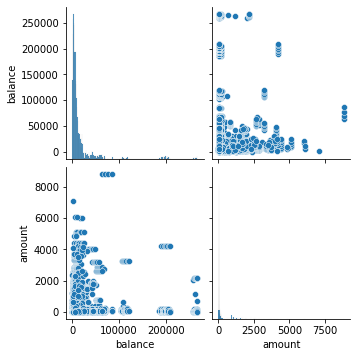

In [22]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['balance', 'amount']]);

Mode of most of the transactions was sales-pos.

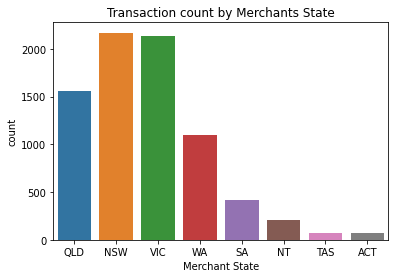

In [23]:
sns.countplot(data=df,x='merchant_state')
plt.title('Transaction count by Merchants State')
plt.xlabel('Merchant State')
plt.show()

Most transactions on friday and wednesday with almost equal distribution across months

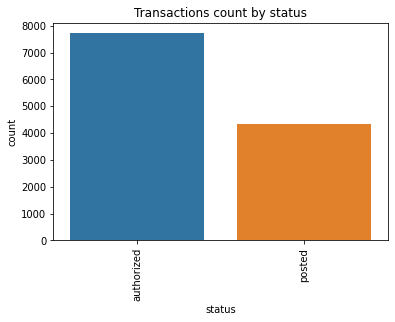

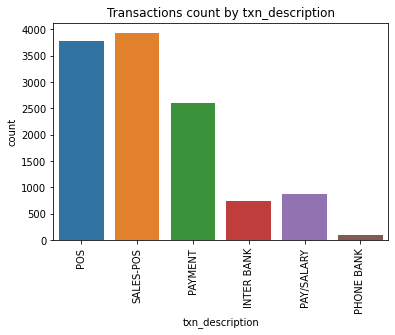

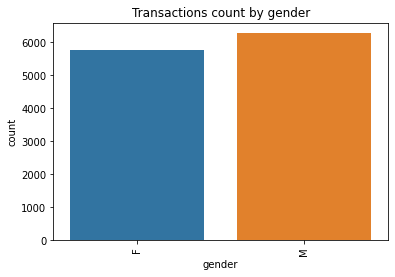

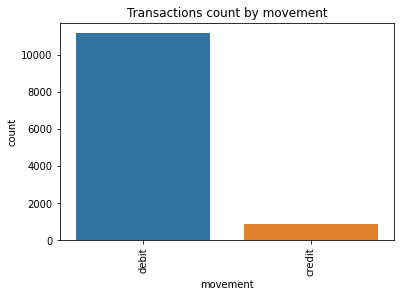

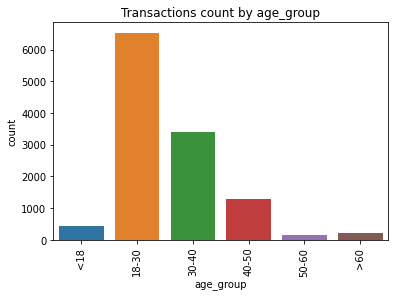

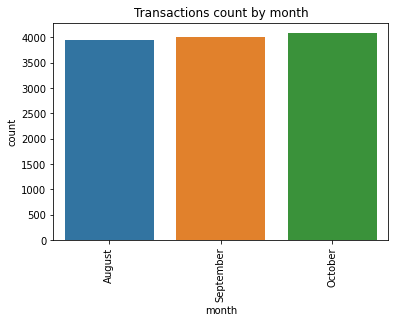

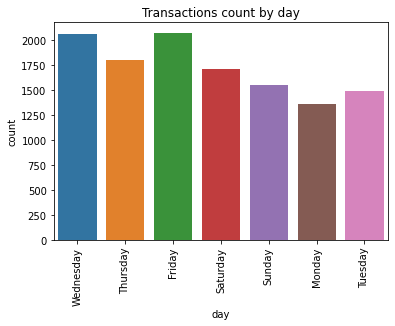

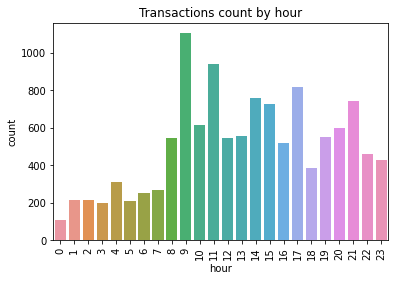

In [24]:

for k in df.columns:
  if ((df.nunique(axis=0)[k] <25) & (df.isnull().sum()[k] == 0)):
    sns.countplot(data=df, x = k)
    plt.title('Transactions count by ' + k)
    plt.xlabel(k)
    plt.xticks(rotation=90)
    plt.show()

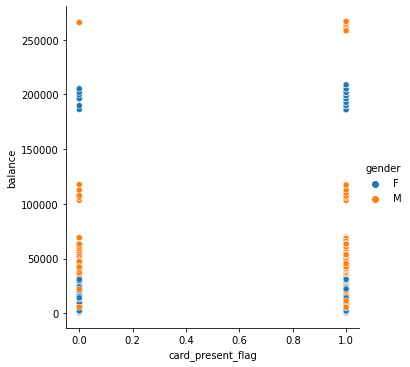

In [25]:
sns.relplot(data=df, x= 'card_present_flag', y='balance', hue='gender')

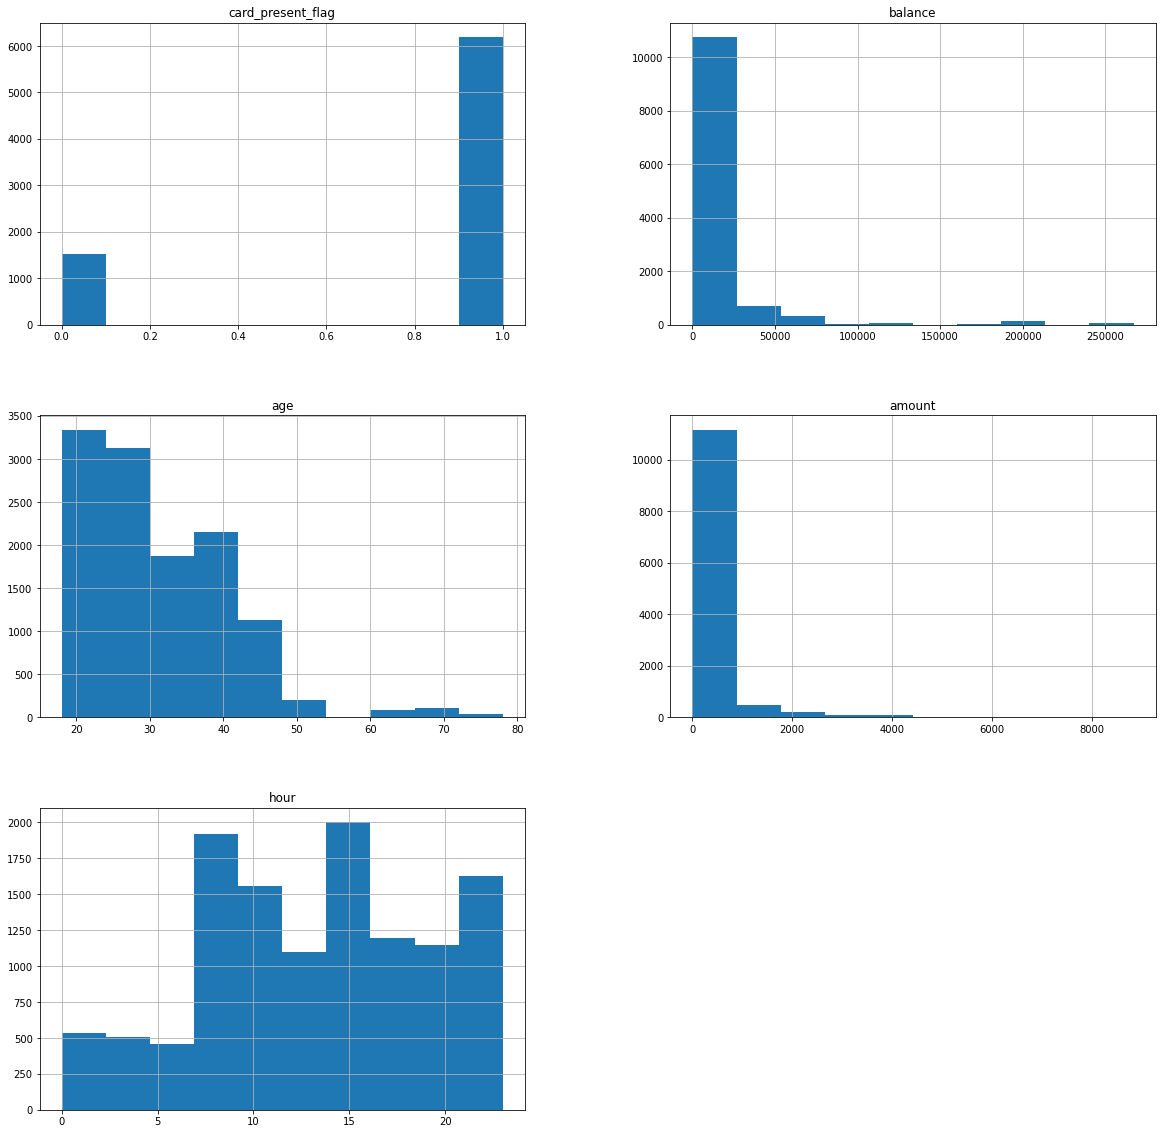

In [26]:
df.hist(figsize = (20,20))
plt.show()

In [27]:
df.describe()[['amount']].reset_index()

,index,amount
0,count,12043.000000
1,mean,187.933588
2,std,592.599934
3,min,0.100000
4,25%,16.000000
5,50%,29.000000
6,75%,53.655000
7,max,8835.980000


In [28]:
gender_amt = df.groupby('gender').mean()[['amount']].reset_index()
print(gender_amt)

  gender      amount
0      F  168.517303
1      M  205.721809


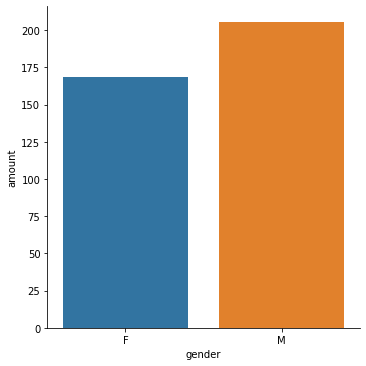

In [29]:
sns.catplot(data=gender_amt, kind='bar',x='gender',y='amount')

In [30]:
txn_amt=df.groupby(by='txn_description').mean()[['amount']].reset_index()
print(txn_amt)

  txn_description       amount
0      INTER BANK    86.699461
1      PAY/SALARY  1898.728029
2         PAYMENT    77.613077
3      PHONE BANK   106.099010
4             POS    40.407412
5       SALES-POS    39.909789


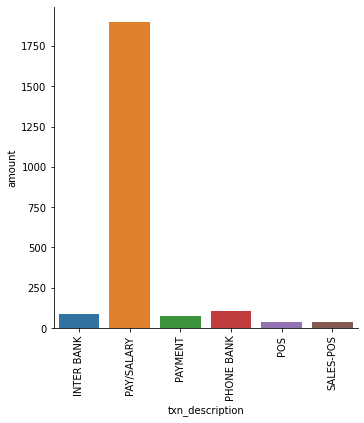

In [31]:
sns.catplot(data=txn_amt, kind='bar',x='txn_description',y='amount')
plt.xticks(rotation=90)
plt.show()

In [32]:
area_amt=df.groupby(by='merchant_suburb').sum()[['amount']].reset_index()
area_amt = area_amt[area_amt['amount'] >= 2000]

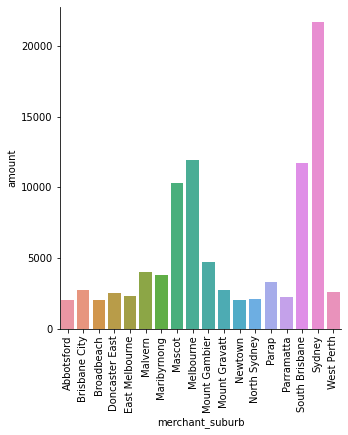

In [33]:
sns.catplot(data= area_amt, kind='bar',x='merchant_suburb',y='amount')
plt.xticks(rotation=90)
plt.show()

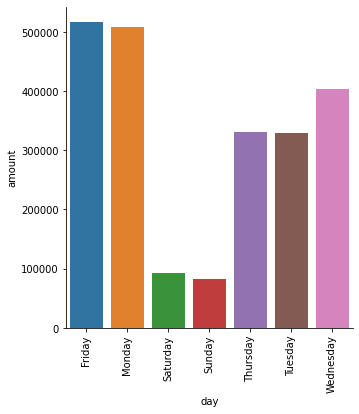

In [34]:
day_amt=df.groupby(by='day').sum()[['amount']].reset_index()
sns.catplot(data= day_amt, kind='bar',x='day',y='amount')
plt.xticks(rotation=90)
plt.show()

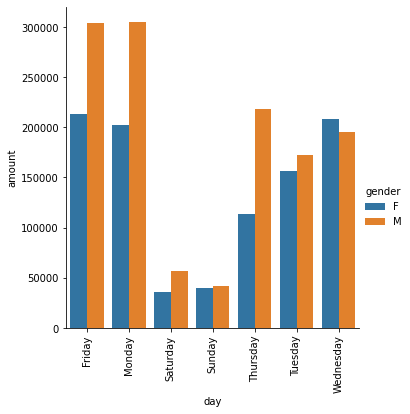

In [35]:
day_gen_amt=df.groupby(by=['day' , 'gender']).sum()[['amount']].reset_index()
sns.catplot(data= day_gen_amt, kind='bar',x = 'day' ,y='amount' , hue = 'gender')
plt.xticks(rotation=90)
plt.show()

In [36]:
df_top5 = (df.groupby(by='customer_id').sum()['amount'].sort_values(ascending=False).head(5))
print(df_top5)

customer_id
CUS-2738291516    45409.16
CUS-3142625864    42688.30
CUS-1816693151    40215.54
CUS-2155701614    37943.79
CUS-261674136     36786.13
Name: amount, dtype: float64


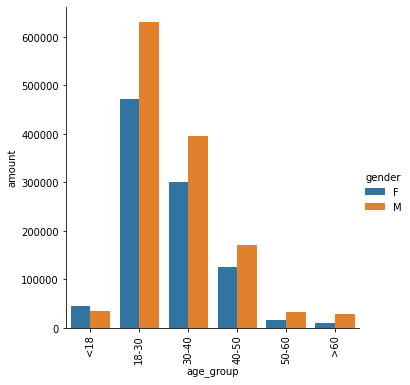

In [37]:
age_gen_amt=df.groupby(by=['age_group' , 'gender']).sum()[['amount']].reset_index()
sns.catplot(data= age_gen_amt, kind='bar',x = 'age_group' ,y='amount' , hue = 'gender')
plt.xticks(rotation=90)
plt.show()

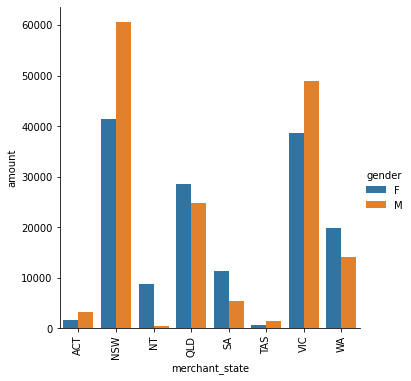

In [38]:
state_gen_amt= df.groupby(by=['merchant_state','gender']).sum()[['amount']].reset_index()
sns.catplot(data= state_gen_amt, kind='bar',x = 'merchant_state' ,y='amount' , hue = 'gender')
plt.xticks(rotation=90)
plt.show()

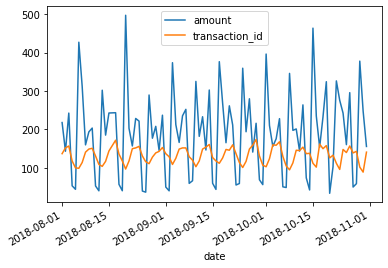

In [39]:
df.groupby(by='date').mean()[['amount']].merge(df.groupby(by='date').count()[['transaction_id']],on='date').plot()

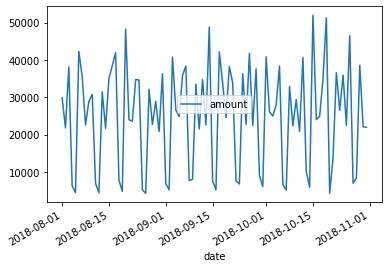

In [40]:
df.groupby(by='date').sum()[['amount']].plot()

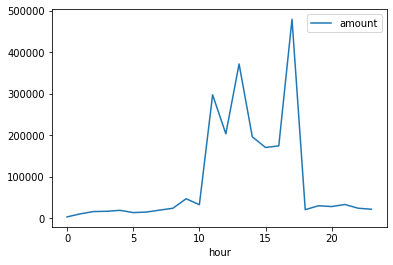

In [41]:
df.groupby(by='hour').sum()[['amount']].plot()

In [42]:
df.pivot_table(['amount', 'balance'],['month'], aggfunc='mean')

,amount,balance
month,,
August,185.121867,10794.148620
October,196.427323,18450.991566
September,182.045903,14730.151136


In [43]:
df.pivot_table(['amount', 'balance'],['month'], aggfunc='sum')

,amount,balance
month,,
August,729935.52,42561328.01
October,802798.47,75409202.53
September,730550.21,59112096.51


# ALL OBSERVATIONS


*   Country is Australia and Currency is AUD.
*   Year in 2018.
*   Spread over cousre of 3 months.
*   Most of the transactions have been done via cards (credit /Debit Card).
*   2/3 of transactions were authorized and 1/3 were posted.
*   Most Transactions are of debit type.
*   Majority of the transactions use "SALES-POS" & "POS' transaction mode.
*   Males more transactions as compared to females.
*   NSW , VIC , QLD are most busy merchant states.
*   ACT & TAS are least busy.
*   Pay/Salary is the major contributor of bank transaction amount.
*   Sydney , Melbourne, South Brisbane , Mascot and Mount Gambier are leading contributers of transaction amount.
*   Overall males carry out more transactions as compared to females but in three states (QLD,WA,SA) females are leading.
*   Weekends have lower transaction amonut.
*   Most transactions are carried out by age group 18-30.
*   There is a increase in Avg transaction amount from August to October.
*   Significant increase in AVG balance maintained by the customer.





